# Obfuscated Webshell Analysis

This Notebook continues the analysis of file entropy as a method for detecting obfuscated webshells in common CMS webroots.

In this Notebook, we will analyze the set of obfuscated webshells and determine whether their entropy would fall outside the expected range for PHP files in the 3 CMS webroots we are investigating: Wordpress, Drupal, and Joomla.

## Data Import

We'll start by importing our DataFrame. If you have not already run `./calculate_entropy.sh`, do so now.

In [1]:
# import stuff
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import os

In [2]:
header_names = [
    "filename",
    "path",
    "entropy",
    "is_elf",
    "md5",
    "sha1",
    "sha256",
    "sha512"
]

In [5]:
df = pd.read_csv("webshell.csv", names=header_names)
df["extension"] = df.filename.apply(lambda f: os.path.splitext(f)[-1])
df = df[df.extension == ".php"]
df.drop(["md5","sha1","sha256","sha512","is_elf"], axis=1, inplace=True)

In [6]:
df.head()

,filename,path,entropy,extension
0,1n73ctionShell_15d337a54e42ed3f2f13d91a85297ab...,Webshell-samples/samples/webshell/PHP-backdoor...,5.67,.php
1,AlucarShell_45850bc2b7479adc188649a8069240f506...,Webshell-samples/samples/webshell/PHP-backdoor...,5.67,.php
2,AngelShell_27d6f1d66639d4bb55f2ccf05a4a20ba4ee...,Webshell-samples/samples/webshell/PHP-backdoor...,5.68,.php
3,Anjiyo_abf229975796ff6a16ac459bf91fe81f2b8f951...,Webshell-samples/samples/webshell/PHP-backdoor...,5.80,.php
4,AnonGhostShell_508c5157ace424468a4d1ef489444ca...,Webshell-samples/samples/webshell/PHP-backdoor...,5.99,.php


## Entropy Analysis

With the data loaded, let's review the distribution and central tendency of our webshells' entropies.

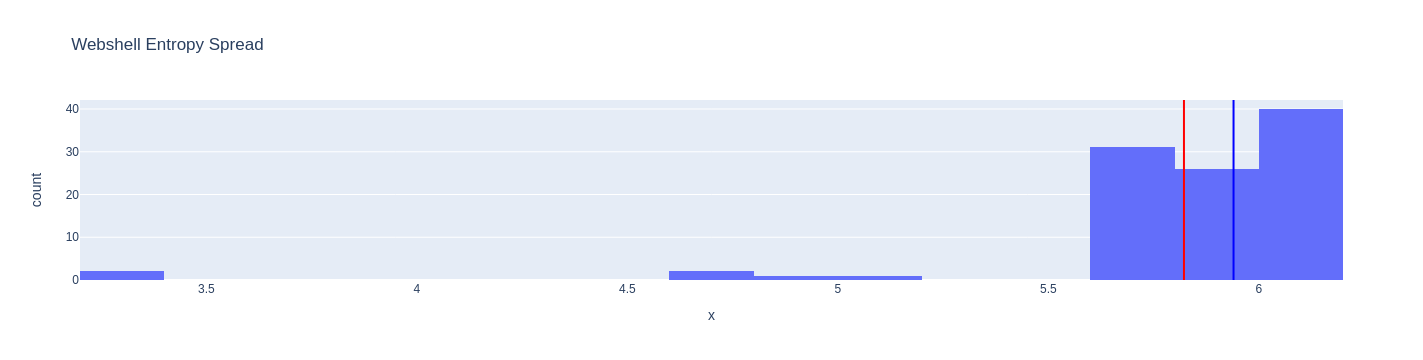

In [9]:
# Full Dataset entropy
fig = px.histogram(x=df.entropy, title="Webshell Entropy Spread")
# Add mean/median lines
fig.add_vline(x=df.entropy.mean(), line_color="red")
fig.add_vline(x=df.entropy.median(), line_color="blue")

In [10]:
print(f"Entropy Mean: {df.entropy.mean()}")
print(f"Entropy Median: {df.entropy.median()}")

Entropy Mean: 5.8222330097087385
Entropy Median: 5.94


## Do These Webshells fall Outside the Norm?

Let's recall that the outlier threshold for our PHP files was `5.34`. Given this, the vast majority of our samples exceed this threshold. To put a number to it...


In [17]:
# How many are below threshold?
low_ent = df[df.entropy <= 5.34]
low_ent.shape[0]

6

In [18]:
low_pct = round((low_ent.shape[0] / df.shape[0]) * 100, 2)
print(f"Percent below threshold: {low_pct}")

Percent below threshold: 5.83


## Conclusions

5.83 percent, meaning a 94.17% true positive rate on just detecting PHP files with high entropy. That's pretty good!

But I think we can do better.

In the [next Notebook](Webshell-Predictions.ipynb), we'll add additional raw file data to entropy to build a feature set in order to train a simple machine learning model to detect webshells.